# Proyek Analisis Data: E-commerse Public Dataset
- **Nama:** Retha Novianty Sipayung
- **Email:** rethaspy91dz@gmail.com
- **ID Dicoding:** retha_sipayung

## Menentukan Pertanyaan Bisnis

1. Berapa persentase pesanan yang tiba tepat waktu sesuai dengan perkitaan pengiriman?

2. Apakah ada pola atau tren tertentu dalam keterlambatan pengiriman, seperti waktu tertentu dalam tahun?

3. Bagaimana tren jumlah order bulanan dari waktu ke waktu?

4. Bagaimana segmentasi pelanggan berdasarkan lokasi geografisnya?

## Import Semua Packages/Library yang Digunakan

In [58]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

####customers_data

In [59]:
customers_data = pd.read_csv('https://raw.githubusercontent.com/rethaaspy/e-commerse/main/data/customers_dataset.csv')
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


####orders_data

In [6]:
orders_data = pd.read_csv('https://raw.githubusercontent.com/rethaaspy/e-commerse/main/data/orders_dataset.csv')
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


####geolocation_data

In [7]:
geolocation_data = pd.read_csv('https://raw.githubusercontent.com/rethaaspy/e-commerse/main/data/geolocation_dataset.csv')
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

####Assessing customers_data

In [8]:
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
#Cek tipe data customers_data
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
#Cek apakah customers_data mengandung nilai null
customers_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
#Cek jumah data duplikat pada customers_data
print("Jumlah data duplikat: ", customers_data.duplicated().sum())

Jumlah data duplikat:  0


In [12]:
customers_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Assessing orders_data

In [13]:
#Cek tipe data orders_data
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
#Cek apakah orders_data mengandung nilai null
orders_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
#Cek jumah data duplikat pada orders_data
print("Jumlah data duplikat: ", orders_data.duplicated().sum())

Jumlah data duplikat:  0


In [16]:
orders_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Assessing geolocation_data

In [17]:
#Cek tipe data geolocation_data
geolocation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
#Cek apakah geolocation_data mengandung nilai null
geolocation_data.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
#Cek jumah data duplikat pada geolocation_data
print("Jumlah data duplikat: ", geolocation_data.duplicated().sum())

Jumlah data duplikat:  261831


In [20]:
geolocation_data.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Cleaning Data


#### Cleaning customers_data

In [62]:
#customers_data sudah bersih karena tidak ada null dan duplikat

#### Cleaning orders_data

#####Changing data type


In [22]:
# Mengonversi kolom-kolom tanggal ke tipe data datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'])
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])


In [23]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Fill value for Nan in orders_data

In [24]:
orders_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
# Mengisi nilai yang hilang dengan nilai minimum pada kolom 'order_delivered_customer_date'
min_date = orders_data['order_delivered_customer_date'].min()
orders_data['order_delivered_customer_date'].fillna(min_date, inplace=True)

In [26]:
orders_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64

In [27]:
orders_data['order_approved_at'].fillna(orders_data['order_purchase_timestamp'], inplace=True)


In [28]:
# Menghitung selisih waktu antara 'order_approved_at' dan 'order_delivered_carrier_date' yang tidak NaN
orders_data['order_delivered_carrier_diff'] = pd.to_datetime(orders_data['order_delivered_carrier_date']) - pd.to_datetime(orders_data['order_approved_at'])

# Menghitung rata-rata selisih waktu
average_diff = orders_data['order_delivered_carrier_diff'].mean()

# Mengisi nilai NaN dalam kolom 'order_delivered_carrier_date' dengan menambahkan rata-rata selisih waktu ke 'order_approved_at'
orders_data['order_delivered_carrier_date'].fillna(pd.to_datetime(orders_data['order_approved_at']) + average_diff, inplace=True)

# Menghapus kolom 'order_delivered_carrier_diff'
orders_data.drop(columns=['order_delivered_carrier_diff'], inplace=True)


In [29]:
orders_data.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [30]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [31]:
orders_data.head()
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [32]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


#### Cleaning geolocation_data

##### Delete duplicate data

In [33]:
geolocation_data.drop_duplicates(inplace=True)

In [34]:
print('Jumlah data duplikat: ', geolocation_data.duplicated().sum())

Jumlah data duplikat:  0


#####Changing data type

In [35]:
# Konversi tipe data kolom 'geolocation_zip_code_prefix' menjadi integer
geolocation_data['geolocation_zip_code_prefix'] = geolocation_data['geolocation_zip_code_prefix'].astype(int)

In [36]:
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Exploratory Data Analysis (EDA)

### Explore orders_data

In [37]:
# Hitung selisih waktu antara tanggal pengiriman aktual dan tanggal pengiriman perkiraan
orders_data['delivery_delay'] = pd.to_datetime(orders_data['order_delivered_customer_date']) - pd.to_datetime(orders_data['order_estimated_delivery_date'])
orders_data.delivery_delay.head()



0    -8 days +21:25:13
1    -6 days +15:27:45
2   -18 days +18:06:29
3   -13 days +00:28:42
4   -10 days +18:17:02
Name: delivery_delay, dtype: timedelta64[ns]

In [38]:
#nilai negatif menunjukkan pesanan tiba lebih awal dari perkiraan pengiriman

In [39]:
# Menentukan pesanan yang tiba tepat waktu (tidak ada keterlambatan)
on_time_orders = orders_data[orders_data['delivery_delay'] <= pd.Timedelta(0)]
on_time_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8 days +21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6 days +15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18 days +18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13 days +00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10 days +18:17:02


In [40]:
# Mengekstrak bulan dari kolom tanggal pengiriman
orders_data['delivery_month'] = orders_data['order_delivered_customer_date'].dt.to_period('M')

In [41]:
# Menghitung jumlah pesanan terlambat per bulan
delayed_orders_per_month = orders_data[orders_data['delivery_delay'] > pd.Timedelta(0)].groupby('delivery_month').size()
delayed_orders_per_month.head()


delivery_month
2016-10     1
2016-11     2
2016-12     2
2017-02     2
2017-03    64
Freq: M, dtype: int64

In [42]:
# Ekstrak bulan dan tahun dari kolom order_purchase_timestamp
orders_data['order_month'] = orders_data['order_purchase_timestamp'].dt.to_period('M')

In [43]:
# Hitung jumlah pesanan bulanan
monthly_orders = orders_data.groupby('order_month').size()

# Tampilkan hasil
print(monthly_orders)


order_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


### Explore geolocation_data


### Explore all data

In [44]:
# Gabungkan data pelanggan dan geolokasi
merged_customers_geolocation = pd.merge(
    left=customers_data,
    right=geolocation_data,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

merged_customers_geolocation = merged_customers_geolocation.drop_duplicates(subset=['customer_id'])
merged_customers_geolocation

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
126,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.726853,-46.545746,sao bernardo do campo,SP
251,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.527788,-46.660310,sao paulo,SP
285,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.496930,-46.185352,mogi das cruzes,SP
368,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.987222,-47.151073,campinas,SP
...,...,...,...,...,...,...,...,...,...,...
10327568,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937.0,-23.587901,-46.501830,são paulo,SP
10327605,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764.0,-23.612294,-46.765787,taboao da serra,SP
10327685,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115.0,-3.744128,-38.510859,fortaleza,CE
10327784,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120.0,-29.956391,-51.167614,canoas,RS


In [45]:
# Gabungkan hasil gabungan sebelumnya dengan data pesanan
all_df = pd.merge(
    left=merged_customers_geolocation,
    right=orders_data,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

all_df = all_df.drop_duplicates(subset=['customer_id'])
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,delivery_month,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-11 days +10:35:35,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.726853,-46.545746,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,-8 days +12:41:19,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1 days 17:58:51,2018-06,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,-13 days +16:04:25,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.987222,-47.151073,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,-6 days +20:55:48,2018-08,2018-07


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persentase pesanan yang tiba tepat waktu sesuai dengan perkitaan pengiriman?


In [47]:
# Persentase pesanan yang tiba tepat waktu dan terlambat
percentage_on_time = (len(on_time_orders) / len(orders_data)) * 100
percentage_delayed = 100 - percentage_on_time

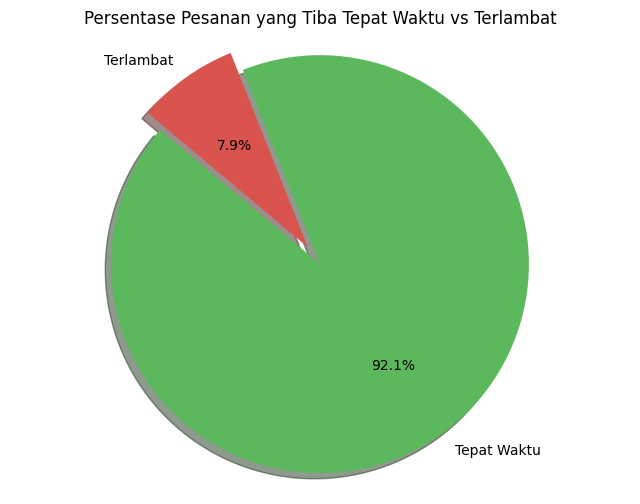

In [48]:
# Membuat pie chart
labels = ['Tepat Waktu', 'Terlambat']
sizes = [percentage_on_time, percentage_delayed]
colors = ['#5cb85c', '#d9534f']
explode = (0.1, 0)  # Pisahkan bagian 'Tepat Waktu'

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Pesanan yang Tiba Tepat Waktu vs Terlambat')
plt.axis('equal')  # Agar pie chart menjadi lingkaran
plt.show()

### Pertanyaan 2: Apakah ada pola atau tren tertentu dalam keterlambatan pengiriman, seperti waktu tertentu dalam tahun?

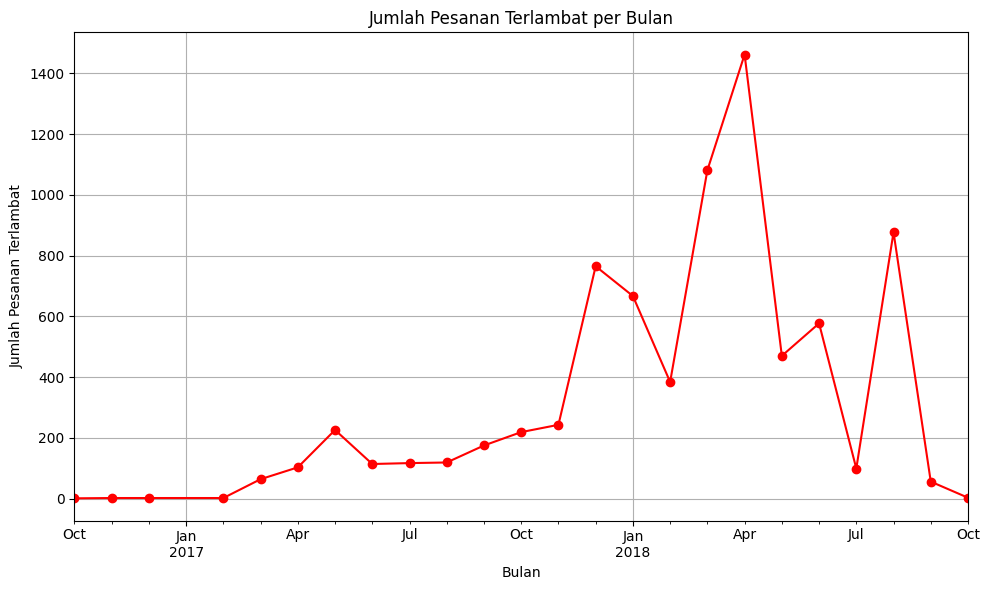

In [49]:
# Memvisualisasikan pola keterlambatan pengiriman
plt.figure(figsize=(10, 6))
delayed_orders_per_month.plot(color='red', marker='o', linestyle='-')
plt.title('Jumlah Pesanan Terlambat per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan Terlambat')
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Bagaimana tren jumlah order bulanan dari waktu ke waktu?



In [50]:
# Hitung jumlah pesanan bulanan
monthly_orders = orders_data.groupby('order_month').size()

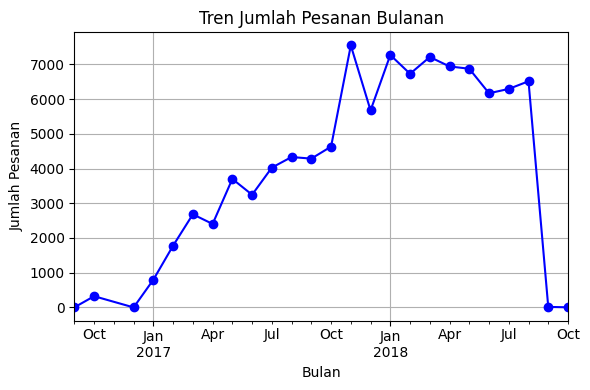

In [51]:
# Buat plot
plt.figure(figsize=(6, 4))
monthly_orders.plot(marker='o', color='b', linestyle='-')
plt.title('Tren Jumlah Pesanan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.tight_layout()

# Tampilkan plot
plt.show()

##Geoanalysis







###Pertanyaan 4 :  Bagaimana segmentasi pasar atau pelanggan Anda dapat dikategorikan berdasarkan lokasi geografis mereka?

In [54]:
# Menggabungkan data pelanggan dengan data geolokasi berdasarkan kode pos
merged_data = pd.merge(customers_data, geolocation_data, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
merged_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP


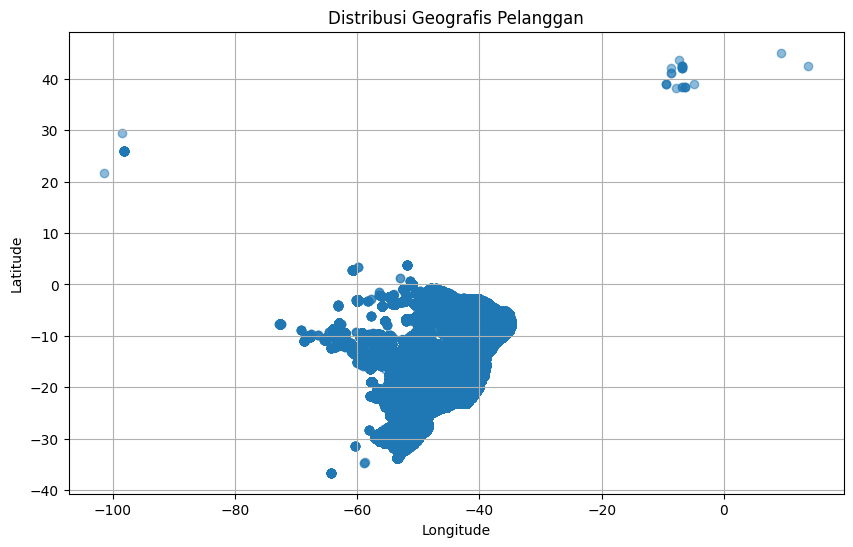

In [55]:
# Visualisasi distribusi geografis pelanggan
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['geolocation_lng'], merged_data['geolocation_lat'], alpha=0.5)
plt.title('Distribusi Geografis Pelanggan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

##Membuat dashboard

In [56]:
all_df.to_csv("all_data.csv", index=False)

In [57]:
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,delivery_month,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-11 days +10:35:35,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.726853,-46.545746,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,-8 days +12:41:19,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.527788,-46.660310,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1 days 17:58:51,2018-06,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.496930,-46.185352,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,-13 days +16:04:25,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.987222,-47.151073,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,-6 days +20:55:48,2018-08,2018-07


## Conclusion

Conclution pertanyaan 1. Berapa persentase pesanan yang tiba tepat waktu sesuai dengan perkitaan pengiriman?
> Mayoritas pesanan, yaitu sebanyak **92.1% tepat waktu** sesuai perkiraan pengiriman. Hanya **7.9% pesanan yang terlambat**

Conclution pertanyaan 2. Apakah ada pola atau tren tertentu dalam keterlambatan pengiriman, seperti waktu tertentu dalam tahun? :
> Data keterlambatan pengiriman menunjukkan **tidak adanya pola atau tren musiman** (seasonality), dengan fluktuasi yang **tidak signifikan** sepanjang tahun.


Conclution pertanyaan 3. Bagaimana tren jumlah order bulanan dari waktu ke waktu? :
> Adanya **tren positif** pada jumlah order bulanan dari tahun 2017 ke 2018, dengan lonjakan signifikan pada Oktober 2018 mencapai lebih dari 6000 order.


Conclution pertanyaan 4. Bagaimana segmentasi pelanggan berdasarkan lokasi geografisnya?
> Analisis geografis menunjukkan konsentrasi pelanggan di cluster tertentu, dengan **mayoritas berada di belahan bumi utara**. Klaster **kecil teridentifikasi di belahan bumi selatan.**

